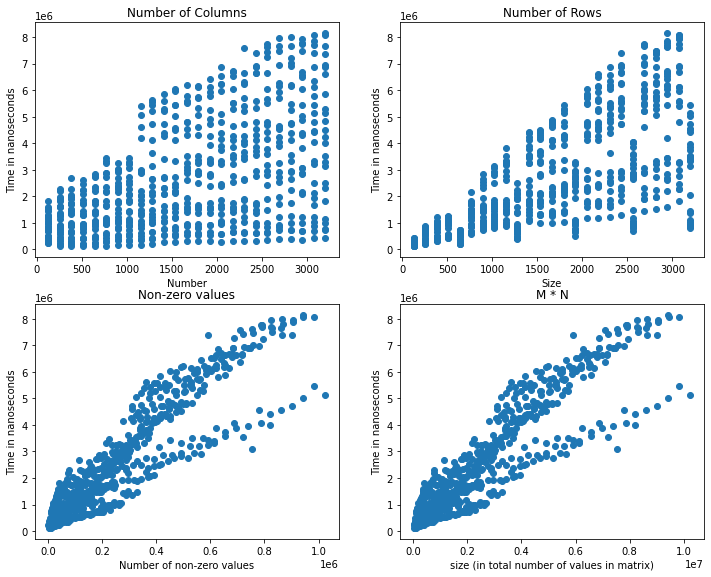

In [75]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression as lm
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import plotly.io as pio
pio.renderers.default = 'iframe_connected'

df = pd.read_csv('run_4.csv', sep = ";")
df2 = pd.read_csv('par_run.csv')

x = df[["Matrix Size M", "Matrix Size N", "Non-zero values"]]
y = df.loc[:, "Time spent"]

plt.rcParams["figure.figsize"] = (12,9.5)
ax1 = plt.subplot(2,2,1)
plt.title("Number of Columns")
ax1.set_xlabel("Number")
ax1.set_ylabel("Time in nanoseconds")
plt.scatter(x["Matrix Size M"], y)
ax2 = plt.subplot(2,2,2)
plt.title("Number of Rows")
ax2.set_xlabel("Size")
ax2.set_ylabel("Time in nanoseconds")
plt.scatter(x["Matrix Size N"], y)
ax3 = plt.subplot(2,2,3)
ax3.set_xlabel("Number of non-zero values")
ax3.set_ylabel("Time in nanoseconds")
plt.title("Non-zero values")
plt.scatter(x["Non-zero values"], y)
ax4 = plt.subplot(2,2,4)
plt.title("M * N")
ax4.set_xlabel("size (in total number of values in matrix)")
ax4.set_ylabel("Time in nanoseconds")
plt.scatter(x["Matrix Size M"] * x["Matrix Size N"], y)
plt.savefig('IDA_spmv.png')
plt.show()



Coefficient of determination: 0.72


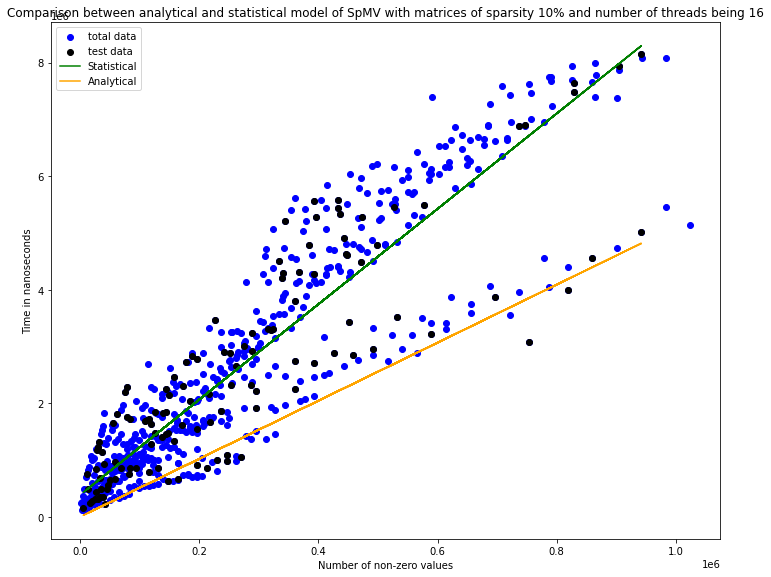

In [76]:
df["Matrix Size"] = df["Matrix Size M"] * df["Matrix Size N"]
y = df["Time spent"]
x = df[["Non-zero values"]]

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

model = lm().fit(x_train, y_train)
predictions_statistical = model.predict(x_test)


n_test = df["Matrix Size N"].iloc[x_test.index.values]
# for ind in x_test.index.values:
#     df["Matrix Size N"].iloc(ind)

def analytical_model_part1(nzV,  n_threads):
    return ((nzV)/(n_threads)) * 81.779315
def analytical_model_part2(n,  n_threads):
    return ((n)/(n_threads)) * 0.9433

predictions_analytical_p1 = analytical_model_part1(x_test, 16)
predictions_analytical_p2 = analytical_model_part2(n_test, 16)
# print(x_test)
# print(predictions_analytical_p1)
# print(predictions_analytical_p2)
predictions_analytical =predictions_analytical_p1["Non-zero values"] + predictions_analytical_p2
# print(predictions_analytical)
print("Coefficient of determination: %.2f" % r2_score(y_test, predictions_statistical))

# plt.rcParams["figure.figsize"] = (12,9)
plt.scatter(x, y, label="total data", color="blue")
plt.scatter(x_test, y_test, label="test data", color='black')
statistical = plt.plot(x_test, predictions_statistical, color="green", label="Statistical")
analytical = plt.plot(x_test, predictions_analytical,  color="orange", label="Analytical")
plt.legend()
# plt.legend([statistical, analytical], ['label1', 'label2'])
plt.xlabel("Number of non-zero values")
plt.ylabel("Time in nanoseconds")
plt.title("Comparison between analytical and statistical model of SpMV with matrices of sparsity 10% and number of threads being 16")
plt.savefig('Comparison.png')
plt.show()


       Matrices       csc      csr
0    arc130.mtx   97436.0  48659.2
1    ash958.mtx   61299.2  37992.8
2  bcspwr06.mtx   63378.4  42342.4
3  ch7-7-b1.mtx   77306.4  57982.4
4  fs_760_1.mtx  232177.6  42673.6


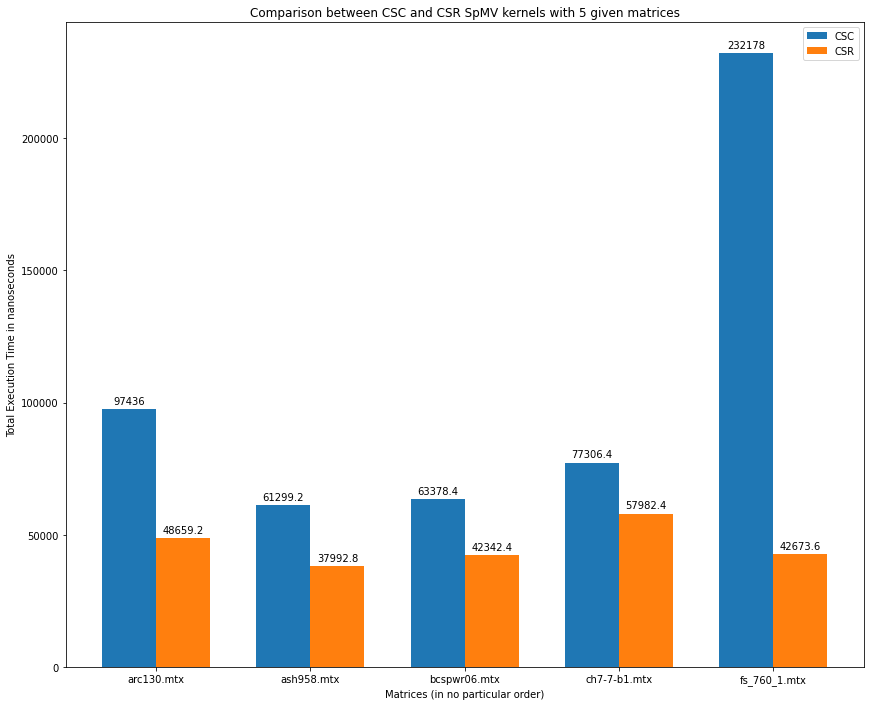

In [74]:
print(df2)
import numpy as np
width = 0.35 

fig, ax = plt.subplots()
x = np.arange(len(df2["Matrices"] ))  # the label locations
ax.set_xticks(x, df2["Matrices"] )
rects1 = ax.bar(x - width/2, df2["csc"], width, label='CSC')
rects2 = ax.bar(x + width/2, df2["csr"], width, label='CSR')


ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)
fig.tight_layout()

plt.legend()
# plt.legend([statistical, analytical], ['label1', 'label2'])
plt.xlabel("Matrices (in no particular order)")
plt.ylabel("Total Execution Time in nanoseconds")
plt.title("Comparison between CSC and CSR SpMV kernels with 5 given matrices")
plt.savefig('parformance.png')
plt.show()